https://medium.com/tencent-thailand/intro-to-poisson-regression-22fb33918839

https://stats.idre.ucla.edu/stata/dae/poisson-regression/
https://www.quora.com/When-should-I-use-Poisson-distribution

https://www.quora.com/What-are-famous-examples-of-using-Poisson-distribution-in-modelling

https://ademos.people.uic.edu/Chapter19.html

Poisson regression – Poisson regression is often used for modeling count data. Poisson regression has a number of extensions useful for count models. Negative binomial regression – Negative binomial regression can be used for over-dispersed count data, that is when the conditional variance exceeds the conditional mean.
https://stats.stackexchange.com/questions/3024/why-is-poisson-regression-used-for-count-dat

https://www.quora.com/What-kinds-of-problems-should-be-modeled-using-Poisson-Distribution

In [10]:
import pandas as pd
import numpy as np

In [11]:
bikes = pd.read_csv('../Data/nyc-east-river-bicycle-counts.csv')

In [12]:
bikes.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [13]:
bikes.drop('Unnamed: 0', 1)

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471
5,2016-04-06 00:00:00,2016-04-06 00:00:00,45.0,30.0,0,1885.0,3329,3856.0,2849.0,11919
6,2016-04-07 00:00:00,2016-04-07 00:00:00,57.0,53.1,0.09,1276.0,2581,3282.0,2457.0,9596
7,2016-04-08 00:00:00,2016-04-08 00:00:00,46.9,44.1,0.01,1982.0,3455,4113.0,3194.0,12744
8,2016-04-09 00:00:00,2016-04-09 00:00:00,43.0,37.9,0.09,504.0,997,1507.0,1502.0,4510
9,2016-04-10 00:00:00,2016-04-10 00:00:00,48.9,30.9,0,1447.0,2387,3132.0,2160.0,9126


In [15]:
# checking data types to identify which variables are continuous, categorical and count
# note: my dependent variable, "Total" is an integer (count)
bikes.dtypes

Unnamed: 0               int64
Date                    object
Day                     object
High Temp (°F)         float64
Low Temp (°F)          float64
Precipitation           object
Brooklyn Bridge        float64
Manhattan Bridge         int64
Williamsburg Bridge    float64
Queensboro Bridge      float64
Total                    int64
dtype: object

In [16]:
# checking if there are any nans in the dataset
bikes.isnull().values.any()

False

In [17]:
# generating descriptive statistics summary
bikes['Total'].describe()

count      210.000000
mean     14534.500000
std       5569.173496
min       4335.000000
25%       9596.000000
50%      15292.500000
75%      18315.000000
max      23318.000000
Name: Total, dtype: float64

Skewness: -0.242981
Kurtosis: -0.907534


/home/raghav/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


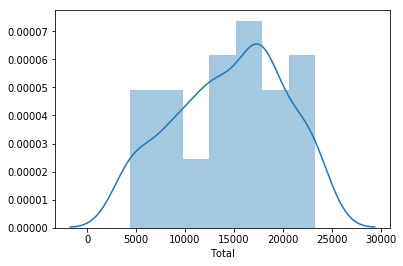

In [29]:
#checking the distribution to see if there are any outliers
import seaborn as sns
from matplotlib.pyplot import plot 

sns.distplot(bikes['Total']);

#skewness and kurtosis
print("Skewness: %f" % bikes['Total'].skew())
print("Kurtosis: %f" % bikes['Total'].kurt())


In [24]:
# creating a new column for average temperature by adding the highest and
#the lowest temperature and dividing it by 2
bikes['Average Temp'] = (bikes['High Temp (°F)'] + bikes['Low Temp (°F)'])/2

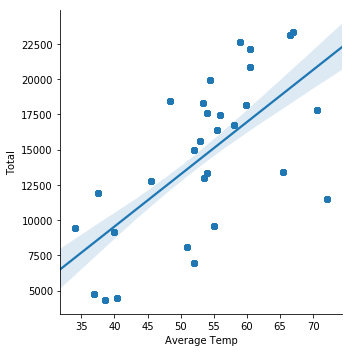

In [25]:
# plotting average temperature against total number of bikes 
# linear regression
sns.lmplot('Average Temp', 'Total', data=bikes)

In [26]:
# since I am predicting a count value, I should fit a poisson regression. 
import statsmodels.api as sm

X = bikes['Average Temp']
y = bikes['Total']

# add intercept to input variable
X = sm.add_constant(X)

# fit poisson regression model 
model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# add poisson fitted values to dataframe
bikes['reg_fit'] = model.fittedvalues

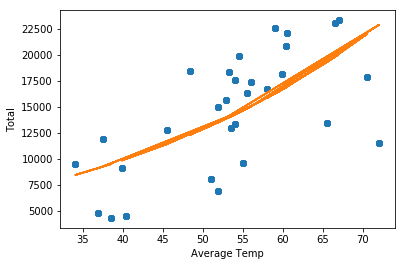

In [30]:
# plot & add a regression line
sns.regplot(bikes['Average Temp'], bikes['Total'], fit_reg=False)
plot(bikes['Average Temp'], bikes['reg_fit']);